## Sử dụng thuật toán k-means và HAC để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


##**I. k-Means Clustering trong Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
dataset = pd.read_csv('Iris.csv')

In [4]:
dataset.shape

(150, 6)

In [5]:
X = dataset.iloc[:, [3,4]].values  
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
X.shape

(150, 2)

## 1) Tìm số clusters tối ưu bằng   Elbow Method

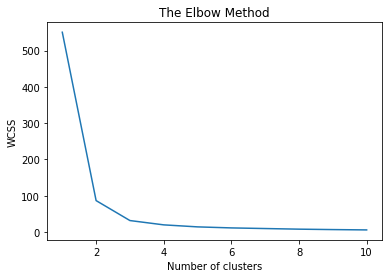

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Từ đồ thị trên ta chọn   `n_clusters = 3`

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
#cetroids của các clusters
kmeans.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

## 3) Visualising the clusters 

In [12]:
y_kmeans.shape

(150,)

In [13]:
X.shape

(150, 2)

Text(0, 0.5, 'PetalWidthCm')

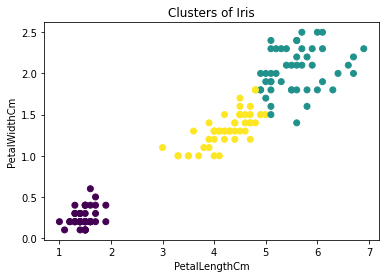

In [14]:
plt.scatter(X[:,0], X[:, 1], c= y_kmeans ) #colors được xác định bằng cluster
plt.title('Clusters of Iris')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

##### Có thể xác định đặc điểm từng nhóm và vẽ chi tiết với nhiều chú thích hơn

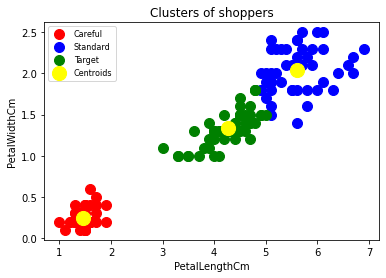

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()

## 4)  Clustering with non-optimal number of clusters

##### Thử  phân nhóm với n_clusters là một giá trị không tối ưu xem kết quả ra sao

In [16]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##### Visualising 

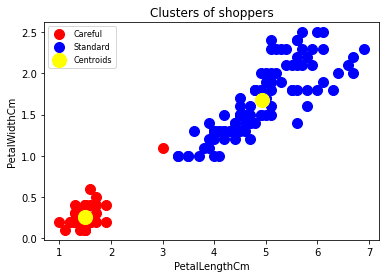

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Standard')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show() 

Có thể thấy sự phân nhóm này không tốt bằng

##**II. Hierarchical Agglomerative Clustering (HAC) trong Python**

# 1)Tìm số clusters tối ưu bằng  dendrogram
Using Dendrogram to find the optimal number of clusters' profiles
* The vertical axis of the dendrogram represents the euclidean distances or dissimilarity between clusters. 
* The horizontal axis represents all possible clusters compounds.   
* Based on the respective analysis objective, dissimilarity threshold in terms of euclidean distances can be set across the dendrogram to define the number of clusters that meet the required threshold.  
* The optimal number of clusters can be found by first locating the highest vertical axis without cutting the horizontal axis. Then count the total number of vertical axis that meet this criteria. In this case study, there are 3 axes. 

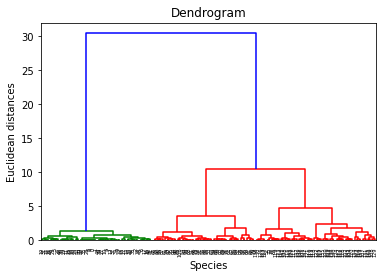

In [18]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

## 2)  Sử dụng class `AgglomerativeClustering`

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [20]:
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 3) Visualising the clusters:

Text(0, 0.5, 'PetalWidthCm')

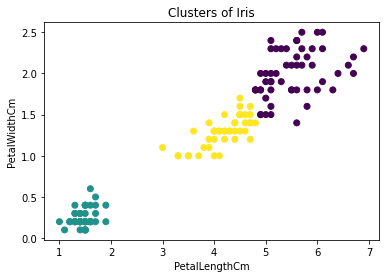

In [21]:
plt.scatter(X[:,0], X[:, 1], c= y_hc ) #colors được xác định bằng cluster
plt.title('Clusters of Iris')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

##### Có thể xác định đặc điểm từng nhóm và vẽ chi tiết với nhiều chú thích hơn

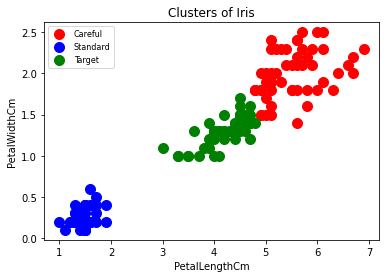

In [22]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Iris')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()

## 4)  Clustering with non-optimal number of clusters

In [23]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 8, 7, 1, 1, 1, 3, 1, 7, 3, 1, 7, 1, 3, 1,
       1, 7, 1, 7, 8, 7, 8, 1, 1, 1, 1, 8, 1, 3, 7, 3, 7, 8, 1, 1, 1, 1,
       7, 7, 1, 1, 7, 3, 1, 1, 1, 1, 3, 7, 6, 4, 6, 2, 6, 5, 1, 2, 2, 6,
       4, 4, 6, 4, 4, 4, 2, 5, 5, 8, 6, 4, 5, 8, 6, 2, 8, 8, 6, 2, 2, 2,
       6, 8, 2, 6, 6, 2, 8, 4, 6, 4, 4, 6, 6, 4, 4, 4, 4, 4])

##### Visualising 

Text(0, 0.5, 'PetalWidthCm')

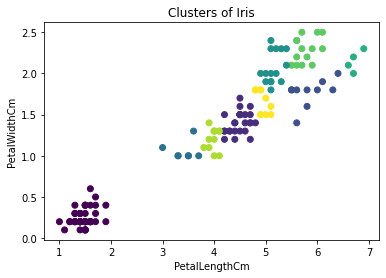

In [25]:
plt.scatter(X[:,0], X[:, 1], c= y_hc ) #colors được xác định bằng cluster
plt.title('Clusters of Iris')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')